In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)#torch只能處理二維以上的數據
y=x.pow(2)+0.2*torch.rand(x.size())

x,y=Variable(x),Variable(y)

In [3]:
print('x:',x)
print('\n')
print('y:',y)

x: tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [

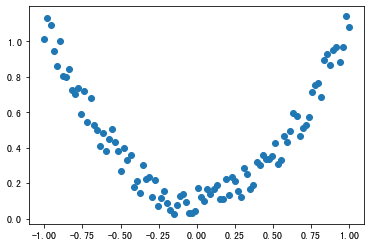

In [4]:
plt.scatter(x,y)

In [5]:
class Net(torch.nn.Module):#繼承
    def __init__(self,n_feature,n_hidden,n_output):#搭網路要的訊息
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):#前項傳遞的過程
        x = F.relu(self.hidden(x))#activation function
        x = self.predict(x)
        return x

In [6]:
net = Net(1, 10, 1)#1個特徵，10個神經元，1個輸出
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
loss_func = torch.nn.MSELoss()

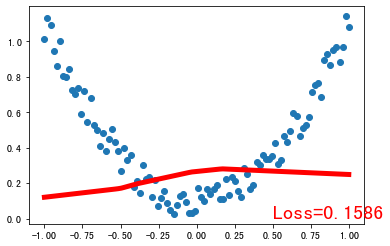

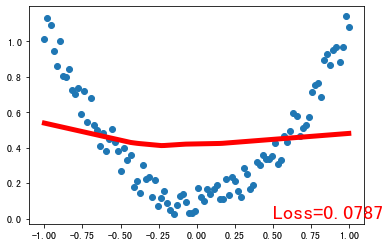

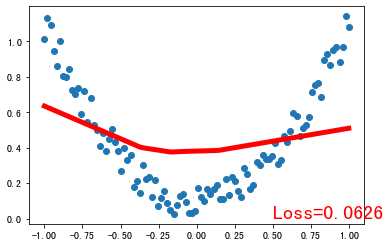

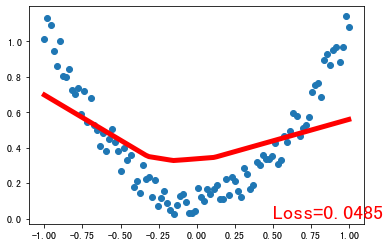

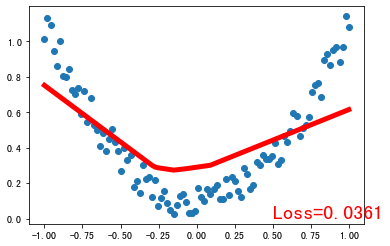

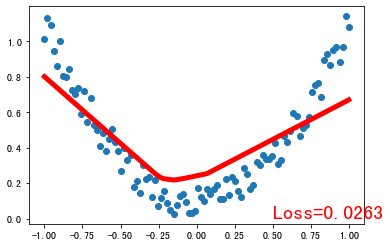

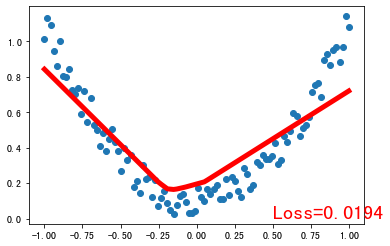

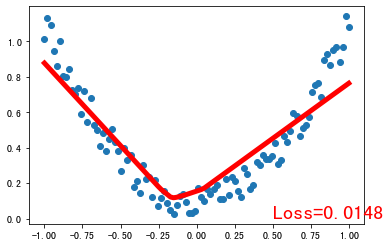

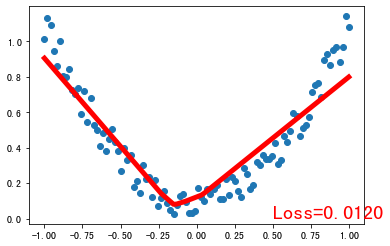

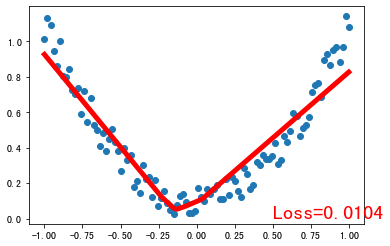

In [8]:
for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction,y)
    
    optimizer.zero_grad()#將梯度都設為0
    loss.backward()#微分
    optimizer.step()#根據lr調整參數
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()
